In [207]:
import cvxpy as cvx
import numpy as np

# Input constraints
max_inp = 0.2

N = 15 # Steps

# Define the target state and obstacles in half-space form
targetLHS = np.matrix([[-1, 0],[0, -1],[1, 0],[0, 1]])
targetRHS = np.matrix([-9.5,-9.5,10.5,10.5]).T

# Matrix to extract the two position states
posMatrix = np.matrix('1,0,0,0;0,1,0,0')

# Define the obstacle
obsLHS = targetLHS
obsRHS = np.array([-3.5,-3.5,6.5,6.5]) + 0.4*np.array([1,1,1,1])

# Vertices of the obstacle
obsVerts = np.asarray([[3.5,3.5,6.5,6.5,3.5],[3.5,6.5,6.5,3.5,3.5]])

# Define the system matrices
A = np.matrix('1,0,1,0;0,1,0,1;0,0,1,0;,0,0,0,1')
B = np.matrix('0.5,0;0,0.5;1,0;0,1')

# Define the decision variables
X = cvx.Variable(4,N+1)
U = cvx.Variable(2,N)
b = cvx.Bool(4,N)

# Big-M
M = 200

# Define dynamic constraints

## Initial condition
con = [X[:,0] == np.matrix('0;0;0;0')]  
## Dynamics
con.extend([X[:,i+1] == A*X[:,i] + B*U[:,i] for i in range(0,N)]) 
## Input constraints
con.extend([cvx.norm(U[:,i],np.inf) <= max_inp for i in range(0,N)]) 
## obstacle avoidance
con.extend([obsLHS * posMatrix * X[:,i] >= obsRHS - M*b[:,i] for i in range(0,N)]) 
con.extend([sum(b[:,i]) <= 3 for i in range(0,N) ]) 
## Terminal constraint 
con.extend([targetLHS * posMatrix * X[:,N] <= targetRHS])

# Define the objective (minimize 1-norm of input)
obj = cvx.Minimize(sum([cvx.norm(U[:,i],1) for i in range(0,N)]))

# Solve the optimization problem
prob = cvx.Problem(obj, con)
prob.solve()

2.0589898990919173

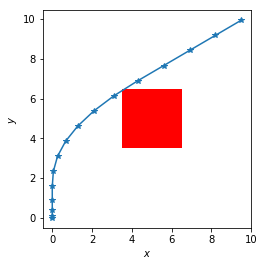

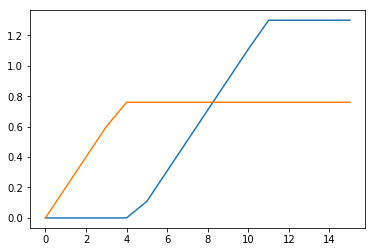

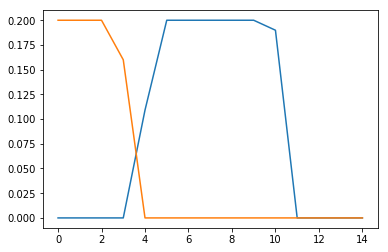

In [208]:
import matplotlib.pyplot as plt
x_vals = X.value.T
u_vals = U.value.T
plt.figure()
plt.plot(x_vals[:,0],x_vals[:,1],'*-')
plt.fill(obsVerts[0,:],obsVerts[1,:],'r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('scaled')
plt.show()

plt.figure()
plt.plot(np.arange(0,N+1).T,x_vals[:,2],'-')
plt.plot(np.arange(0,N+1).T,x_vals[:,3],'-')
plt.show()

plt.figure()
plt.plot(np.arange(0,N).T,u_vals[:,0],'-')
plt.plot(np.arange(0,N).T,u_vals[:,1],'-')
plt.show()

In [185]:
A = np.matrix('1,2,3;4,5,6;7,8,9')
A[:,2]

matrix([[3],
        [6],
        [9]])